# WEEK 10 (10 December)

### Objectives
* Create distance matrix for all the locations $\checkmark$
* Do hierarchical agglomerative clustering $\checkmark$
* Figure out how many levels we want etc.
* Produce OD matrices for different levels of clustering

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from hm.pop_models.pop_explicit import explicit as pop_explicit
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation
from hm.analysis import clustering

In [6]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/CDRC/england_welsh_scotland_pwc2011.csv")
x = np.array(df)[:,5]
y = np.array(df)[:,6]
m = np.array(df)[:,2]
xy = np.array([x, y])
xy = np.transpose(xy)
p = pop_explicit(xy, m)

We use hierarchical agglomerative clustering to cluster the locations.

Let's try with different distance thresholds (these are 

In [39]:
d_max = 2000.
cluster_1 = clustering.Clusters(p, d_max)

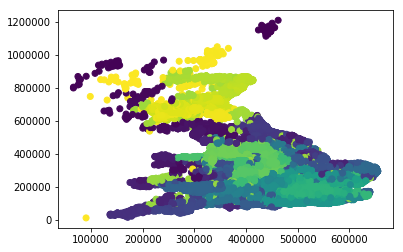

In [40]:
cluster_1.viz_clusters()

Let's work with London only:

In [27]:
x_min = 490000
x_max = 565000
y_min = 150000
y_max = 210000
lon_df = df[x_min < df.Easting]
lon_df = lon_df[df.Easting < x_max]
lon_df = lon_df[y_min < df.Northing]
lon_df = lon_df[df.Northing < y_max]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [28]:
x_lon = np.array(lon_df)[:,5]
y_lon = np.array(lon_df)[:,6]
m_lon = np.array(lon_df)[:,2]
xy_lon = np.array([x, y])
xy_lon = np.transpose(xy)
p_lon = pop_explicit(xy, m)

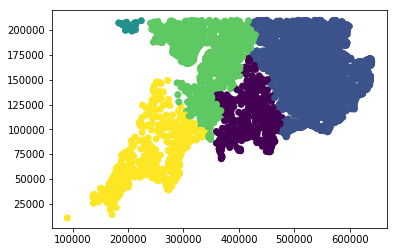

In [30]:
d_max = 100000.
lon_clusters = clustering.Clusters(p_lon, d_max)
lon_clusters.viz_clusters()